<a href="https://colab.research.google.com/github/ahmetcanerdem/Bil470Proje/blob/master/Network%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
! pip install  kaggle
import tensorflow as tf
from google.colab import files

from IPython.display import clear_output

In [9]:
files.upload()
!cd drive
!cd "My Drive"
!mkdir data
!cd data
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

KeyboardInterrupt: ignored

In [5]:
! kaggle competitions download -c siim-isic-melanoma-classification
#clear_output()

429 - Too Many Requests


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir train_t
! unzip "*.dcm.zip" -d train

clear_output()

In [1]:
!pip install pydicom
import pydicom as dicom
import matplotlib.pyplot as plt
clear_output()

NameError: ignored

In [ ]:
image_path = './train/ISIC_0015719.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

FileNotFoundError: ignored

In [ ]:
ds.PatientID[1:-1]

In [3]:
import os
from PIL import Image
import numpy as np

In [15]:
DATA=[]
classvector=[]
c=0
for i in os.listdir('./train/train_0/'):
  clear_output(wait=True)
  print(c)
  c= c+1
  path='./train/train_0/' + i
  im=Image.open(path)
  im=im.resize((512,512))
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA.append(im)
  classvector.append(0)
DATA[0]
for i in os.listdir('./train/train_1/'):
  clear_output(wait=True)
  print(c)
  c= c+1
  path='./train/train_1/' + i
  im=Image.open(path)
  im=im.resize((512,512))
  im=np.array(im)
  im=np.array(im,dtype='float64')
  im = im/255
  DATA.append(im)
  classvector.append(1)


199


In [5]:
DATA=np.reshape(DATA,newshape=(-1,512,512,3))

In [14]:
print(len(DATA))
print(len(classvector))

200
200


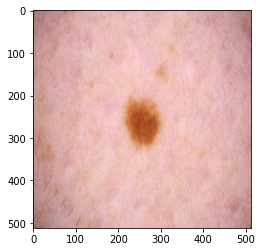

In [7]:
imdata=DATA*255
imdata=np.array(imdata,dtype='uint8')
plt.imshow(imdata[0])

In [16]:
model= tf.keras.Sequential([
                            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(512,512,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(512,512,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(512,512,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')

])

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 253, 253, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 16)      4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 61504)            